In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [117]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [118]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

C:\Users\Dell\AppData\Local\Temp\ipykernel_21312\1982466889.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Category'],palette='husl')


<Axes: xlabel='Category', ylabel='count'>

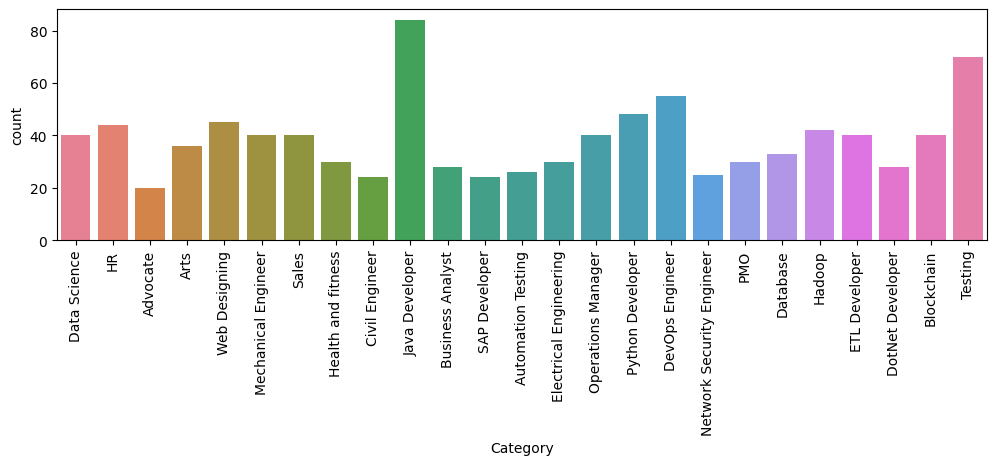

In [119]:
plt.figure(figsize=(12,3))
plt.xticks(rotation=90)
sns.countplot(x=df['Category'],palette='husl')

In [120]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

In [121]:
print(df['Resume'][0])

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

In [122]:
import re
import string
def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [151]:
clean_text("*** hello world wwww.gmail.com 120%%*")

'hello world 120'

In [124]:
clean_text(df['Resume'][0])

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM Nave Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the revie

In [125]:
df['Resume'] = df['Resume'].apply(lambda x :clean_text(x))

In [126]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM Nave Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the revie

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
label = LabelEncoder()
df['Category_Label'] = label.fit_transform(df['Category'])

In [129]:
df.head()

,Category,Resume,Category_Label
0,Data Science,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details May 2013 to May 2017 BE UITR...,6
2,Data Science,Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...,6


In [130]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [131]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = word_tokenize(text)
    return " ".join([lemmatizer.lemmatize(word) for word in words])

df['Resume'] = df['Resume'].apply(lambda x:lemmatize_text(x))

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [133]:
vector = TfidfVectorizer(max_features=5000,stop_words='english')
x = vector.fit_transform(df['Resume'])

In [134]:
from sklearn.model_selection import train_test_split
y = df['Category_Label']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=45,test_size=0.2)

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [138]:
models = {
    'RandomForestClassifier':RandomForestClassifier(),
    'LogisticRegression':LogisticRegression(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'XGBClassifier':XGBClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier()
}

In [137]:
params = {
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],  
        'max_depth': [None, 10, 20, 30],  
        'min_samples_split': [2, 5, 10],  
        'min_samples_leaf': [1, 2, 4],  
        'bootstrap': [True, False]  
    },
    'LogisticRegression': {
        'penalty': ['l1', 'l2', 'elasticnet', None],  
        'C': [0.01, 0.1, 1, 10, 100],  
        'solver': ['lbfgs', 'liblinear', 'saga'],  
        'max_iter': [100, 200, 300]  
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 200],  
        'learning_rate': [0.01, 0.1, 1, 1.5],  
        'algorithm': ['SAMME', 'SAMME.R']  
    },
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],  
        'max_depth': [None, 10, 20, 30],  
        'min_samples_split': [2, 5, 10],  
        'min_samples_leaf': [1, 2, 4]  
    },
    'XGBClassifier': {
        'n_estimators': [50, 100, 200],  
        'learning_rate': [0.01, 0.1, 0.2],  
        'max_depth': [3, 5, 7],  
        'subsample': [0.5, 0.7, 1.0],  
        'colsample_bytree': [0.5, 0.7, 1.0]  
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],  
        'weights': ['uniform', 'distance'],  
        'metric': ['euclidean', 'manhattan', 'minkowski']  
    }
}

In [144]:
from sklearn.model_selection import RandomizedSearchCV
report = {}
for i in range(len(models)):
    name = list(models.keys())[i]
    print(f"************* Enter {name} ************\n")
    model = list(models.values())[i]
    param = params[name]
    random = RandomizedSearchCV(estimator=model,param_distributions=param,n_jobs=-1,cv=3,n_iter=50,scoring='accuracy',random_state=45)
    random.fit(x_train,y_train)
    y_pred=random.predict(x_test)
    print(classification_report(y_test,y_pred))
    report[name]=random.best_params_
    print(f"************* Exit {name} ************\n")
    

************* Enter RandomForestClassifier ************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.94      0.97        16
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00        19
          16       1.00 

d:\Data Science\Resume Classification\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Data Science\Resume Classification\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Data Science\Resume Classification\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Data Science\Resume Classification\venv\Lib\site-pack

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        11
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.94      0.97        16
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        10
          17       1.00    

d:\Data Science\Resume Classification\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\Data Science\Resume Classification\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Data Science\Resume Classification\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Data S

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.05      0.88      0.10         8
           2       1.00      0.88      0.93         8
           3       0.00      0.00      0.00        11
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         9
           7       1.00      1.00      1.00         7
           8       0.00      0.00      0.00        16
           9       0.71      1.00      0.83         5
          10       0.00      0.00      0.00         8
          11       0.88      1.00      0.93         7
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00         7
          14       0.50      1.00      0.67         4
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00        10
          17       1.00    

d:\Data Science\Resume Classification\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.94      0.97        16
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        10
          17       1.00    

In [145]:
report['XGBClassifier']

{'subsample': 0.5,
 'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.2,
 'colsample_bytree': 0.7}

In [146]:
model = XGBClassifier(subsample=0.5,n_estimators=200,max_depth=5,learning_rate=0.2,colsample_bytree=0.7)
model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [147]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        10
          17       1.00    

In [148]:
import joblib
joblib.dump(model,'model.pkl')
joblib.dump(vector,'tf_idf.pkl')
joblib.dump(label,'encoder.pkl')

['encoder.pkl']